In [1]:
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

seed = 232
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\Prithvi\\Downloads\\project archive\\chest_xray\\chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\.DS_Store
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\test\.DS_Store
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\test\NORMAL\IM-0001-0001.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\test\NORMAL\IM-0003-0001.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\test\NORMAL\IM-0005-0001.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\test\NORMAL\IM-0006-0001.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\test\NORMAL\IM-0007-0001.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\test\NORMAL\IM-0009-0001.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\test\NORMAL\IM-0010-0001.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\test\NORMAL\IM-0011-0001-0001.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\test\NORMAL\IM-

C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person1129_bacteria_3070.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person1129_virus_1857.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person112_virus_213.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person1130_bacteria_3072.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person1130_virus_1860.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person1131_bacteria_3073.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person1132_virus_1863.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person1133_bacteria_3075.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person1133_virus_1865.jpeg
C:\Users\Prithvi\D

C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person782_bacteria_2686.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person783_bacteria_2687.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person783_virus_1414.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person785_bacteria_2689.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person786_bacteria_2690.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person787_bacteria_2691.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person788_virus_1419.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person789_bacteria_2694.jpeg
C:\Users\Prithvi\Downloads\project archive\chest_xray\chest_xray\train\PNEUMONIA\person789_virus_1420.jpeg
C:\Users\Prithvi\Do

In [3]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
train = get_training_data('C:\\Users\\Prithvi\\Downloads\\project archive\\chest_xray\\chest_xray\\train')
test = get_training_data('C:\\Users\\Prithvi\\Downloads\\project archive\\chest_xray\\chest_xray\\test')
val = get_training_data('C:\\Users\\Prithvi\\Downloads\\project archive\\chest_xray\\chest_xray\\val')

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



<ipython-input-3-b2613b36a4a4>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



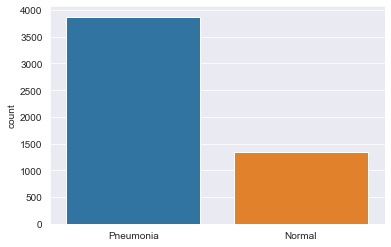

In [6]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)  

Text(0.5, 1.0, 'NORMAL')

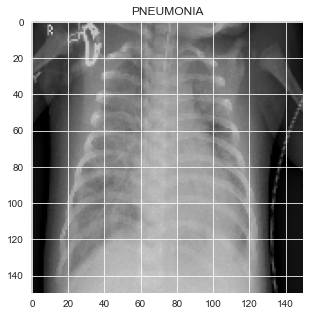

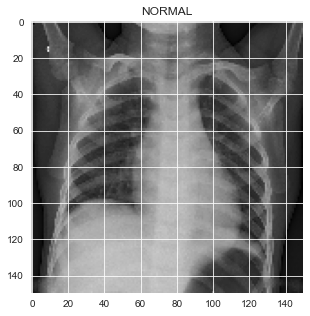

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [8]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [9]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [10]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [11]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

Training the Model

In [12]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [14]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = 
                    datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 204s 1s/step - loss: 1.3243 - accuracy: 0.7909 - val_loss: 26.5314 - val_accuracy: 0.5000
Epoch 2/12
163/163 [==============================] - 207s 1s/step - loss: 0.2771 - accuracy: 0.8923 - val_loss: 23.9021 - val_accuracy: 0.5000
Epoch 3/12
163/163 [==============================] - 206s 1s/step - loss: 0.2216 - accuracy: 0.9131 - val_loss: 1.2441 - val_accuracy: 0.4375

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/12
163/163 [==============================] - 207s 1s/step - loss: 0.1999 - accuracy: 0.9324 - val_loss: 22.0209 - val_accuracy: 0.5000
Epoch 5/12
163/163 [==============================] - 205s 1s/step - loss: 0.1416 - accuracy: 0.9503 - val_loss: 9.0640 - val_accuracy: 0.5625
Epoch 6/12
163/163 [==============================] - 203s 1s/step - loss: 0.1391 - accuracy: 0.9557 - val_loss: 1.7660 - val_accuracy: 0.5625
Epoch 7/12
163/163 [==============================] - 199s

In [15]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 4s 181ms/step - loss: 0.2893 - accuracy: 0.8718
Loss of the model is -  0.28931719064712524
20/20 [==============================] - 4s 182ms/step - loss: 0.2893 - accuracy: 0.8718
Accuracy of the model is -  87.17948794364929 %


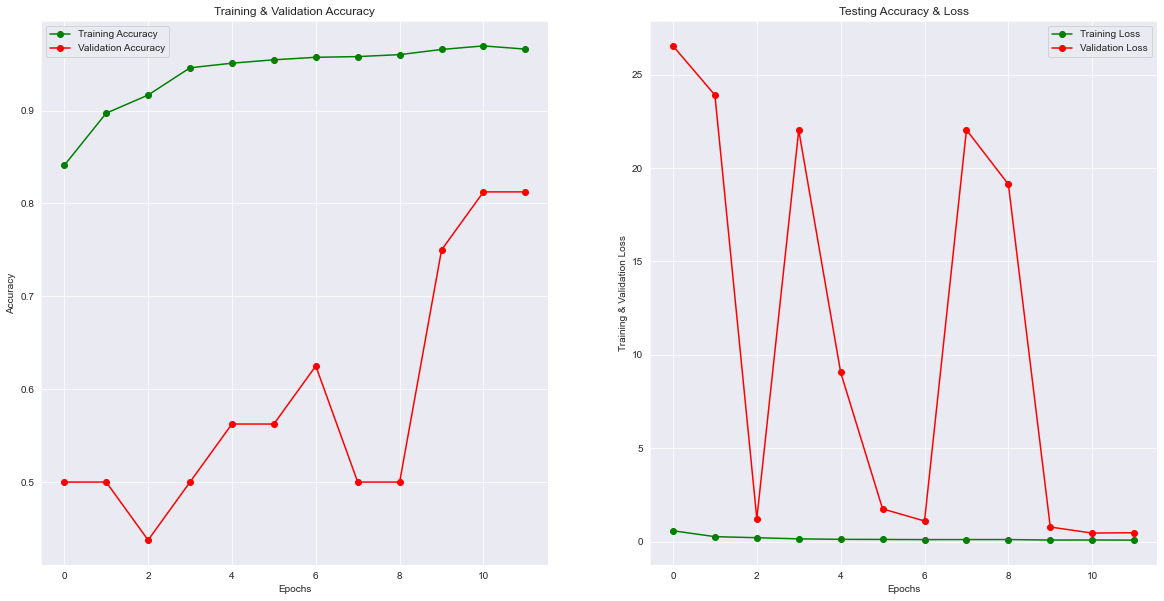

In [16]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [17]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

C:\Users\Prithvi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print('\nTEST METRIC ----------------------')
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))


TEST METRIC ----------------------
                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.94      0.85      0.89       390
   Normal (Class 1)       0.79      0.90      0.84       234

           accuracy                           0.87       624
          macro avg       0.86      0.88      0.87       624
       weighted avg       0.88      0.87      0.87       624


TRAIN METRIC ----------------------
Train acc: 96.63


In [19]:
cm = confusion_matrix(y_test,predictions)
cm

array([[333,  57],
       [ 23, 211]], dtype=int64)

In [20]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

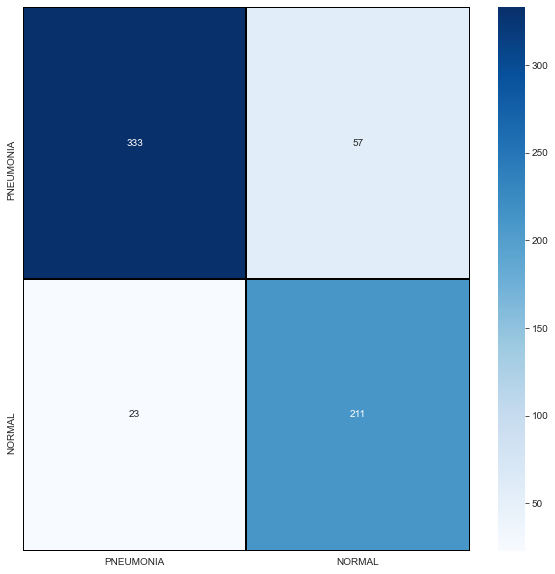

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [22]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

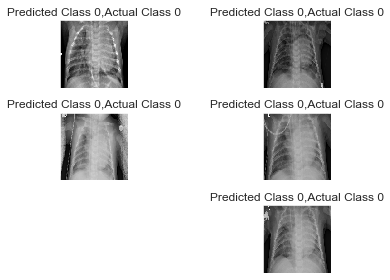

In [23]:
i=0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

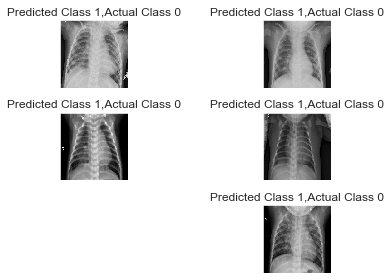

In [24]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

With Adam 

In [25]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "Adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 38, 38, 64)       

In [26]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

history1 = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = 
                   
                      datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 206s 1s/step - loss: 0.5526 - accuracy: 0.8246 - val_loss: 8.4123 - val_accuracy: 0.5000
Epoch 2/12
163/163 [==============================] - 194s 1s/step - loss: 0.1895 - accuracy: 0.9281 - val_loss: 8.4677 - val_accuracy: 0.5000
Epoch 3/12
163/163 [==============================] - 190s 1s/step - loss: 0.1739 - accuracy: 0.9357 - val_loss: 9.9102 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/12
163/163 [==============================] - 192s 1s/step - loss: 0.1327 - accuracy: 0.9538 - val_loss: 2.1139 - val_accuracy: 0.5625
Epoch 5/12
163/163 [==============================] - 193s 1s/step - loss: 0.1326 - accuracy: 0.9523 - val_loss: 0.3080 - val_accuracy: 0.8750
Epoch 6/12
163/163 [==============================] - 196s 1s/step - loss: 0.1250 - accuracy: 0.9524 - val_loss: 0.5211 - val_accuracy: 0.6875
Epoch 7/12
163/163 [==============================] - 196s 1s

In [27]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 4s 176ms/step - loss: 0.2488 - accuracy: 0.9119
Loss of the model is -  0.24875499308109283
20/20 [==============================] - 4s 181ms/step - loss: 0.2488 - accuracy: 0.91192s - los
Accuracy of the model is -  91.18589758872986 %


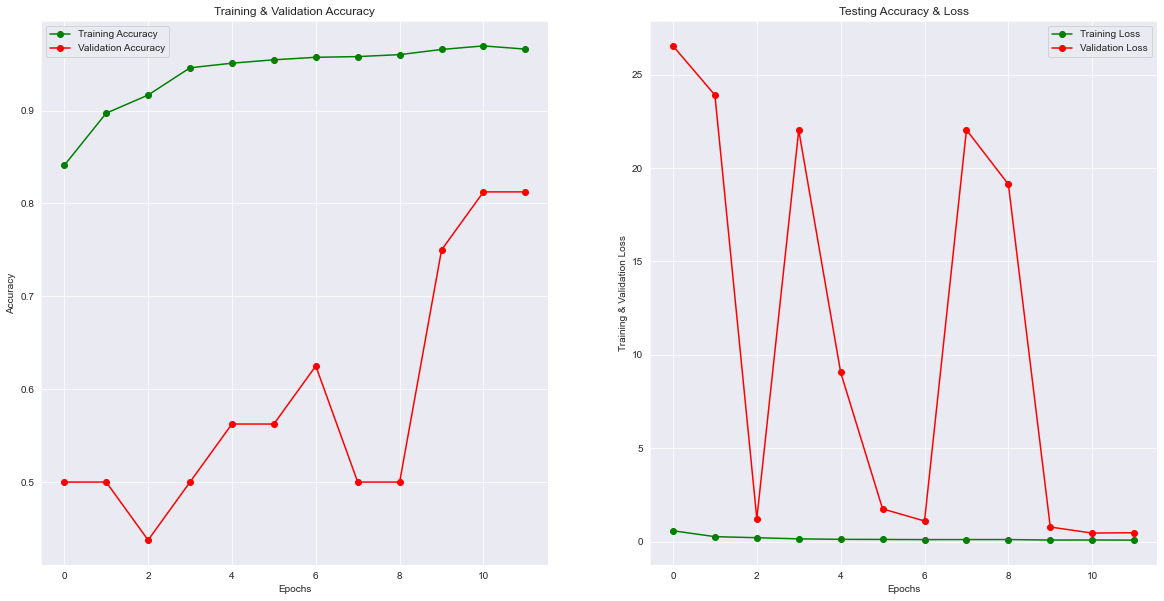

In [28]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [29]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

C:\Users\Prithvi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print('\nTEST METRIC ----------------------')
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history1.history['accuracy'][-1])*100, 2)))


TEST METRIC ----------------------
                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.94      0.92      0.93       390
   Normal (Class 1)       0.87      0.90      0.88       234

           accuracy                           0.91       624
          macro avg       0.90      0.91      0.91       624
       weighted avg       0.91      0.91      0.91       624


TRAIN METRIC ----------------------
Train acc: 97.09


In [31]:
cm = confusion_matrix(y_test,predictions)
cm
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

In [32]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

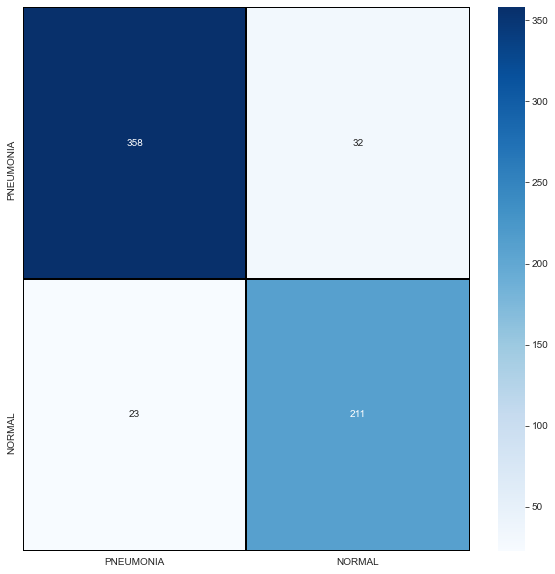

In [33]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [34]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

## Observations:

- We can see that from the above 2 models the model with adam optimizer performed the best with 5% difference between train and test dataset.

In [35]:
from keras.applications.vgg16 import VGG16

In [36]:
Num_classes=2
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [37]:
x = base_model.output
x = Flatten()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [38]:
for layer in model.layers[0:20]:
    layer.trainable = False
model.compile(loss="binary_crossentropy", optimizer='adam',metrics=["accuracy"])    

In [39]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

history3=model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = 
                   
                      callbacks = [learning_rate_reduction])

SyntaxError: invalid syntax (<ipython-input-39-78b32d469cfb>, line 5)